In [42]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Force a non-transparent plot gutter
plt.style.use({'figure.facecolor':'white'})

In [43]:
# Load (and cache) standard MNIST dataset.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Extract the pixel counts.
input_shape = x_train.shape[1] * x_train.shape[2]

# Reshape and rescale the train and test data.
x_train = x_train.reshape(x_train.shape[0], input_shape) / 255.
x_test = x_test.reshape(x_test.shape[0], input_shape) / 255.

# Extract the number of classes.
n_classes = len(set(y_train))

# Convert the class numbers to 1-hot categorical values.
y_train = tf.keras.utils.to_categorical(y_train, n_classes)
y_test = tf.keras.utils.to_categorical(y_test, n_classes)

In [44]:
# Build a single softmax categorical layer.
model = tf.keras.Sequential(
    tf.keras.layers.Dense(
        units=n_classes,
        input_shape=(input_shape,),
        activation='softmax',
    )
)

# Compile using 'Adam'
model.compile(
    optimizer='adam',
    # Needed for the categorical softmax layer.
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

# Print the model summary.
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [45]:
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=128,
    epochs=50,
    verbose=1,
    validation_split=0.2,
)

# Evaluate the model with the test data.
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test loss: {test_loss}, Test accuracy: {test_accuracy}")

Epoch 1/50
375/375 [==============================] - 1s 2ms/step - loss: 0.7351 - accuracy: 0.8209 - val_loss: 0.4081 - val_accuracy: 0.8956
Epoch 2/50
375/375 [==============================] - 1s 1ms/step - loss: 0.3880 - accuracy: 0.8965 - val_loss: 0.3340 - val_accuracy: 0.9094

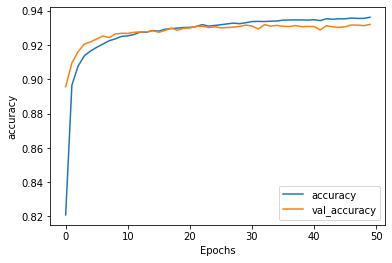

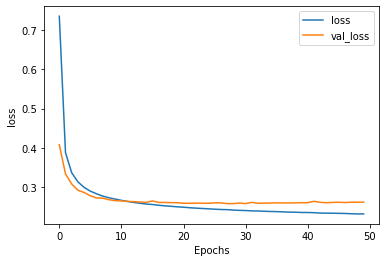

In [46]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")
